In [1]:
pip install fairlearn

   ---------------------------------------- 0.0/231.5 kB ? eta -:--:--
   ------------------------ --------------- 143.4/231.5 kB 4.3 MB/s eta 0:00:01
   ---------------------------------------- 231.5/231.5 kB 2.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from fairlearn.metrics import demographic_parity_difference, equalized_odds_difference
from fairlearn.reductions import ExponentiatedGradient, DemographicParity

In [3]:
# Load a sample dataset from scikit-learn
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X, y = data.data, data.target

In [4]:
# Assume gender is a binary feature (0 or 1)
gender = np.random.choice([0, 1], size=X.shape[0])


In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test, gender_train, gender_test = train_test_split(
    X, y, gender, test_size=0.2, random_state=42
)

In [6]:
# Train a model without gender
model_without_gender = RandomForestClassifier(random_state=42)
model_without_gender.fit(X_train, y_train)
y_pred_without_gender = model_without_gender.predict(X_test)
accuracy_without_gender = accuracy_score(y_test, y_pred_without_gender)

In [7]:
# Train a model with gender
model_with_gender = RandomForestClassifier(random_state=42)
model_with_gender.fit(X_train, y_train, sample_weight=(1 - gender_train))  # Ignoring gender for training
y_pred_with_gender = model_with_gender.predict(X_test)
accuracy_with_gender = accuracy_score(y_test, y_pred_with_gender)


In [8]:
# Evaluate fairness using Demographic Parity
dp_without_gender = demographic_parity_difference(y_test, y_pred_without_gender, sensitive_features=gender_test)
dp_with_gender = demographic_parity_difference(y_test, y_pred_with_gender, sensitive_features=gender_test)

print(f"Accuracy without gender: {accuracy_without_gender:.2f}")
print(f"Accuracy with gender: {accuracy_with_gender:.2f}")
print(f"Demographic Parity without gender: {dp_without_gender:.4f}")
print(f"Demographic Parity with gender: {dp_with_gender:.4f}")


Accuracy without gender: 0.96
Accuracy with gender: 0.96
Demographic Parity without gender: 0.0877
Demographic Parity with gender: 0.0877


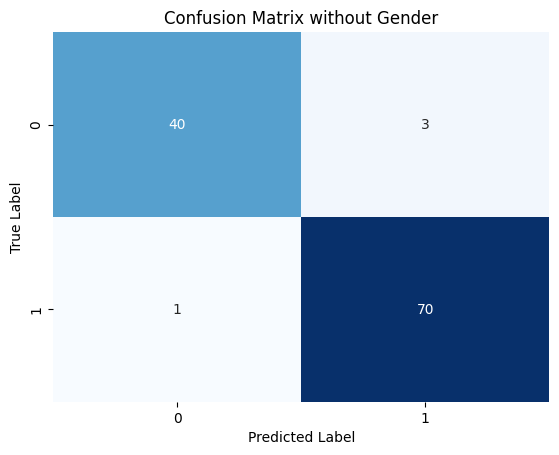

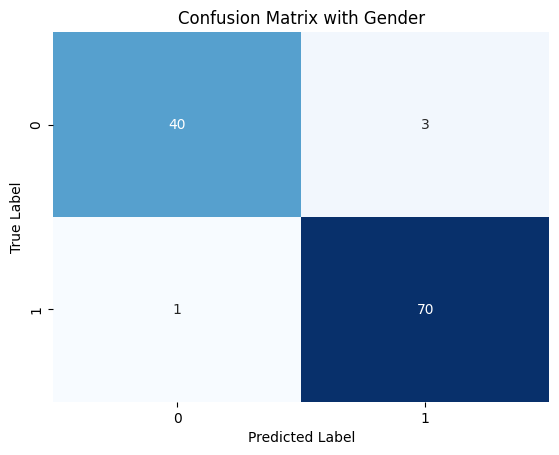

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Visualize confusion matrix for the model without gender
plot_confusion_matrix(y_test, y_pred_without_gender, title="Confusion Matrix without Gender")

# Visualize confusion matrix for the model with gender
plot_confusion_matrix(y_test, y_pred_with_gender, title="Confusion Matrix with Gender")


In [11]:
from fairlearn.metrics import plot_metric

# Visualize demographic parity difference
plot_metric([dp_without_gender, dp_with_gender], group_names=["Without Gender", "With Gender"], title="Demographic Parity Difference")
plt.show()
